# Getting some statistics on transformed images

In this notebook we got, again, some statistics about images, but now after transformation and augmentation (statistics on augmented images)

# Mounting google drive

In order to make it easy to read data from Google Drive, it can be mounted as a "local" unity. This encapsulates the connection to Google API and reduce the amount of coding that would be needed when interacting with Google API

In [1]:
from google.colab import drive

# Install required packages
! pip install pandarallel
! pip install opencv-python

# Mount Drive
drive.mount("/content/gdrive", force_remount=True)

file_placement = "/content/gdrive/MyDrive/09 CS659 Image Processing and Analysis/data"

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16673 sha256=c66481542de464dfb79982865677c9de346724f59188ba3200095e0938cef7e6
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel
Mounted at /content/gdrive


In [3]:
import os
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import pandas as pd

base_folder = os.path.join(file_placement, "..")
train_and_test = pd.read_excel(os.path.join(base_folder, "train_and_test_set.xlsx"))

In [4]:
data_folder = os.path.join(base_folder, "transformed_images")
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(data_folder, transform=transform)

In [5]:
transform =  transforms.Compose(
    [
        transforms.Resize(255),
        transforms.RandomRotation(90),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor()
    ]
)
dataset_augmented = datasets.ImageFolder(data_folder, transform=transform)

In [6]:
final_dataset = torch.utils.data.ConcatDataset([dataset, dataset_augmented])

In [7]:
batch_size = 128
final_dataloader = torch.utils.data.DataLoader(final_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [8]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    # inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    plt.title(title)
    plt.show()

0.0 255.0 131.82 102


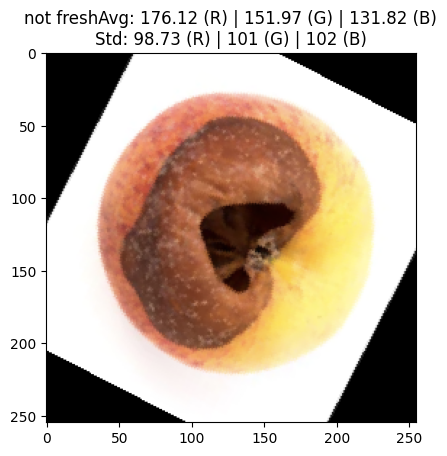

not freshAvg: 176.12 (R) | 151.97 (G) | 131.82 (B)
Std: 98.73 (R) | 101 (G) | 102 (B)
0.0 255.0 79.78 81


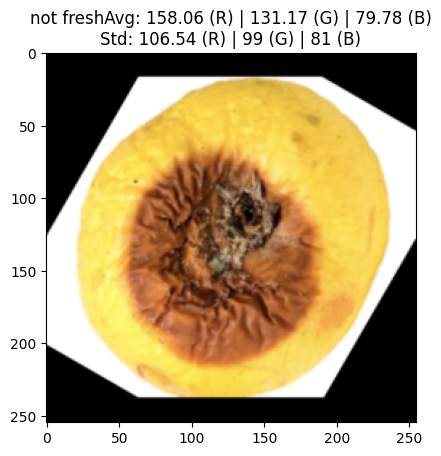

not freshAvg: 158.06 (R) | 131.17 (G) | 79.78 (B)
Std: 106.54 (R) | 99 (G) | 81 (B)
0.0 255.0 110.23 98


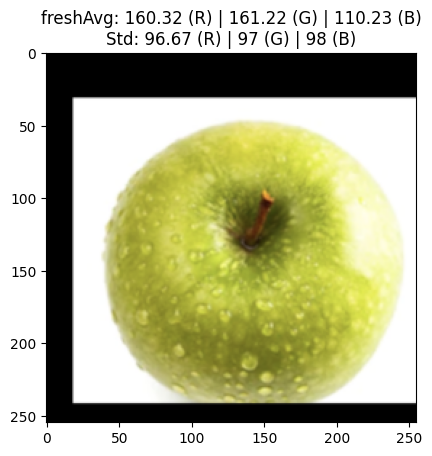

freshAvg: 160.32 (R) | 161.22 (G) | 110.23 (B)
Std: 96.67 (R) | 97 (G) | 98 (B)
0.0 255.0 100.48 92


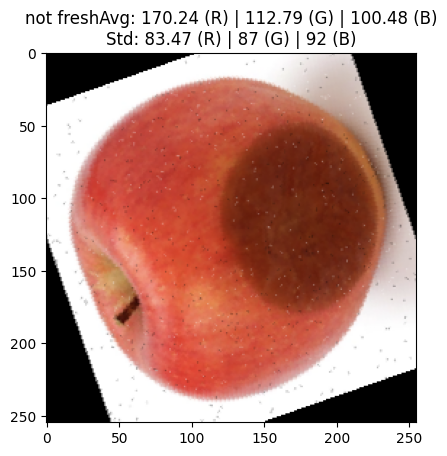

not freshAvg: 170.24 (R) | 112.79 (G) | 100.48 (B)
Std: 83.47 (R) | 87 (G) | 92 (B)
0.0 255.0 137.07 92


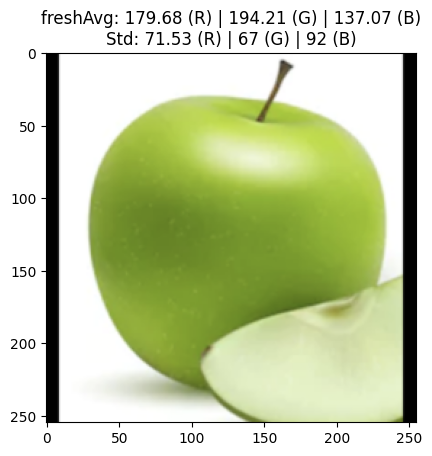

freshAvg: 179.68 (R) | 194.21 (G) | 137.07 (B)
Std: 71.53 (R) | 67 (G) | 92 (B)
0.0 255.0 107.79 98


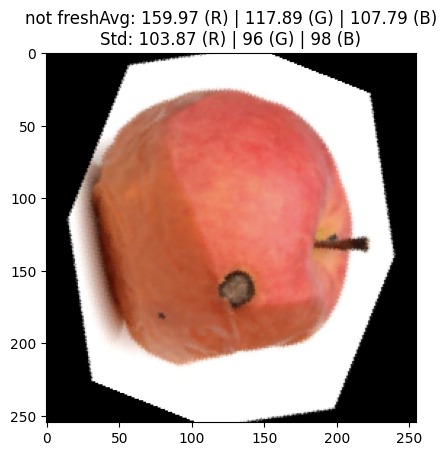

not freshAvg: 159.97 (R) | 117.89 (G) | 107.79 (B)
Std: 103.87 (R) | 96 (G) | 98 (B)


In [9]:
import numpy as np
np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

for x_dataset, y_dataset in final_dataloader:
    for i in range(6):

        r_channel = (x_dataset[i][0] * 255).numpy()
        g_channel = (x_dataset[i][1] * 255).numpy()
        b_channel = (x_dataset[i][2] * 255).numpy()
        r_min, r_max, r_avg, r_std = r_channel.min(), r_channel.max(), round(r_channel.mean(), 2), round(r_channel.std(), 2)
        g_min, g_max, g_avg, g_std = g_channel.min(), g_channel.max(), round(g_channel.mean(), 2), round(g_channel.std())
        b_min, b_max, b_avg, b_std = b_channel.min(), b_channel.max(), round(b_channel.mean(), 2), round(b_channel.std())
        if y_dataset[i] == 0:
            title = "fresh"
        else:
            title = "not fresh"
        # title = f"Min: {int(r_min)} (R) | {int(g_min)} (G) | {int(b_min)} (B)"
        # title = title + f"\nMax: {int(r_max)} (R) | {int(g_max)} (G) | {int(b_max)} (B)"
        title = title + f"Avg: {str(r_avg)} (R) | {str(g_avg)} (G) | {str(b_avg)} (B)"
        title = title + f"\nStd: {str(r_std)} (R) | {str(g_std)} (G) | {str(b_std)} (B)"
        inp = x_dataset[i].numpy().transpose((1, 2, 0))

        print(b_min, b_max, b_avg, b_std)
        imshow(inp, title)
        print(title)
    break

In [10]:
fresh = 0
not_fresh = 0
li = []

for x_dataset, y_dataset in final_dataloader:
    for i in range(len(x_dataset)):
        row = {}
        r_channel = (x_dataset[i][0] * 255).numpy()
        g_channel = (x_dataset[i][1] * 255).numpy()
        b_channel = (x_dataset[i][2] * 255).numpy()
        r_avg, r_std, r_var = round(r_channel.mean(), 2), round(r_channel.std(), 2), round(r_channel.var(), 2)
        g_avg, g_std, g_var = round(g_channel.mean(), 2), round(g_channel.std(), 2), round(g_channel.var(), 2)
        b_avg, b_std, b_var = round(b_channel.mean(), 2), round(b_channel.std(), 2), round(b_channel.var(), 2)

        row["r_avg"] = r_avg
        row["r_std"] = r_std
        row["r_var"] = r_var
        row["g_avg"] = g_avg
        row["g_std"] = g_std
        row["g_var"] = g_var
        row["b_avg"] = b_avg
        row["b_std"] = b_std
        row["b_var"] = b_var

        if y_dataset[i] == 0:
            if fresh < 51:
                row["sample"] = fresh + 1
                row["fresh"] = True
                li.append(row)
                fresh = fresh + 1
        else:
            if not_fresh < 51:
                row["sample"] = not_fresh + 1
                row["fresh"] = False
                li.append(row)
                not_fresh = not_fresh + 1

        if not_fresh > 50 and fresh > 50:
            break



In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame(li)

,r_avg,r_std,r_var,g_avg,g_std,g_var,b_avg,b_std,b_var,sample,fresh
0,168.41,84.64,7163.96,178.20,84.12,7076.04,125.52,90.02,8103.30,1,True
1,168.68,90.86,8255.32,132.83,87.26,7614.73,113.69,90.18,8131.61,1,False
2,159.12,94.37,8905.17,141.74,90.41,8174.72,131.33,90.03,8105.58,2,False
3,166.59,90.94,8270.45,142.88,103.49,10710.10,138.13,106.61,11364.73,3,False
4,150.30,89.79,8061.45,114.62,89.25,7965.72,96.71,94.09,8853.82,4,False
...,...,...,...,...,...,...,...,...,...,...,...
97,184.28,99.45,9889.56,168.66,94.46,8923.29,124.19,91.12,8302.40,51,True
98,159.74,101.50,10301.69,144.88,99.23,9847.23,108.89,95.01,9027.08,48,False
99,224.07,60.99,3719.23,201.38,70.52,4972.40,169.48,95.47,9114.94,49,False
100,157.34,82.33,6778.16,141.63,79.55,6327.74,96.18,70.00,4900.15,50,False
